In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
books=pd.read_csv('/content/drive/My Drive/Books Recommendation/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings=pd.read_csv('/content/drive/My Drive/Books Recommendation/ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
ratings.shape

(981756, 3)

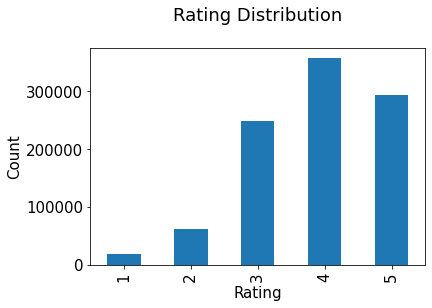

In [6]:
plt.rc("font" ,size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [7]:
rating_count=pd.DataFrame(ratings.groupby('book_id')['rating'].count())
rating_count.sort_values('rating',ascending=False).head()

,rating
book_id,
1,100
5198,100
5215,100
5214,100
9803,100


In [8]:
columns=['book_id','authors','original_title','average_rating','ratings_count']
dataset=books[columns]

In [9]:
dataset.head()

,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
2,41865,Stephenie Meyer,Twilight,3.57,3866839
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664


In [10]:
dataset.shape

(10000, 5)

In [11]:
library=dataset
library.head()

,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
2,41865,Stephenie Meyer,Twilight,3.57,3866839
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664


In [12]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [13]:
rating_count=pd.DataFrame(library,columns=['book_id','ratings_count'])
rating_count.sort_values('ratings_count',ascending=False).drop_duplicates().head(10)

,book_id,ratings_count
0,2767052,4780653
1,3,4602479
2,41865,3866839
3,2657,3198671
4,4671,2683664
5,11870085,2346404
6,5907,2071616
7,5107,2044241
9,1885,2035490
8,960,2001311


In [14]:
most_rated_books=pd.DataFrame([2767052,3,41865,2657,4671], index=np.arange(5), columns=['book_id'])

detail=pd.merge(most_rated_books,library,on='book_id')

In [15]:
detail.head()

,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
2,41865,Stephenie Meyer,Twilight,3.57,3866839
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664


In [16]:
most_rated_book=pd.DataFrame(library,columns=['book_id','authors','original_title','average_ratings','ratings_count'])
most_rated_book.max()

book_id                              33288638
authors            يوسف زيدان, Youssef Ziedan
average_ratings                           NaN
ratings_count                         4780653
dtype: object

In [17]:
most_rated_book.describe()

,book_id,average_ratings,ratings_count
count,1.000000e+04,0.0,1.000000e+04
mean,5.264697e+06,NaN,5.400124e+04
std,7.575462e+06,NaN,1.573700e+05
min,1.000000e+00,NaN,2.716000e+03
25%,4.627575e+04,NaN,1.356875e+04
50%,3.949655e+05,NaN,2.115550e+04
75%,9.382225e+06,NaN,4.105350e+04
max,3.328864e+07,NaN,4.780653e+06


**Content Based Recommender**

In [18]:
books=library
books.head()

,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
2,41865,Stephenie Meyer,Twilight,3.57,3866839
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664


Author like recommendation

In [19]:
author='Suzanne Collins'
author_recommend=books[books['authors']==author]
author_recommend.head()


,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
16,6148028,Suzanne Collins,Catching Fire,4.30,1831039
19,7260188,Suzanne Collins,Mockingjay,4.03,1719760
506,7938275,Suzanne Collins,The Hunger Games Box Set,4.49,129665
1530,262430,Suzanne Collins,Gregor the Overlander,3.99,66823


Above particular ratings

In [20]:
user_like_rating=4.0
user_recommend=books[books['average_rating']>=user_like_rating]
user_recommend.head()

,book_id,authors,original_title,average_rating,ratings_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4780653
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671
5,11870085,John Green,The Fault in Our Stars,4.26,2346404
6,5907,J.R.R. Tolkien,The Hobbit or There and Back Again,4.25,2071616


**Collaborative Filtering Based recommendation**

In [24]:
ratings=pd.read_csv('/content/drive/My Drive/Books Recommendation/ratings.csv')
books=pd.read_csv('/content/drive/My Drive/Books Recommendation/books.csv')

In [30]:
details=pd.DataFrame(books,columns=['book_id','original_title'])
details.head()

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
2,41865,Twilight
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


In [31]:
ratings=pd.merge(details,ratings,on='book_id')
ratings.head()

,book_id,original_title,user_id,rating
0,3,Harry Potter and the Philosopher's Stone,314,3
1,3,Harry Potter and the Philosopher's Stone,588,1
2,3,Harry Potter and the Philosopher's Stone,2077,2
3,3,Harry Potter and the Philosopher's Stone,2487,3
4,3,Harry Potter and the Philosopher's Stone,2900,3


In [32]:
ratings.shape

(79701, 4)

In [38]:
user_ratings=ratings.pivot_table(index=['user_id'],columns=['original_title'],values='rating')
user_ratings.head()

original_title,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,...,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,number9dream,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
user_ratings=user_ratings.dropna(thresh=10,axis=1).fillna(0)
user_ratings.head()

original_title,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,...,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,number9dream,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
item_similarity_df= user_ratings.corr(method='pearson')
item_similarity_df.head()

original_title,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,...,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,number9dream,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,1.000000,-0.003226,-0.003282,-0.002929,-0.003190,-0.002741,-0.003237,-0.003216,-0.003253,-0.003235,-0.003148,-0.003268,-0.003199,-0.003246,-0.003079,0.000447,-0.003227,-0.003232,-0.003251,-0.003241,-0.003257,-0.003243,-0.003255,0.006314,-0.003194,-0.003175,-0.003222,-0.003134,0.005306,-0.003253,-0.003266,-0.003234,-0.003241,0.003911,-0.003105,-0.003183,-0.003216,-0.003185,-0.003204,-0.003260,...,-0.003208,-0.003269,-0.003233,-0.003210,-0.003221,-0.003192,-0.003117,-0.003212,-0.003222,0.006963,0.018430,0.014154,-0.003274,-0.003161,-0.003222,-0.003207,-0.003195,-0.003216,-0.003203,-0.003269,-0.003232,-0.003233,-0.003245,-0.003163,-0.002741,-0.003230,-0.003247,-0.003249,-0.003254,-0.003260,-0.003205,0.010106,-0.003191,-0.003251,-0.003246,-0.003237,-0.003265,-0.003200,-0.003068,0.009124
Animal Farm & 1984,-0.003226,1.000000,-0.003355,-0.002995,-0.003261,-0.002802,0.006308,-0.003288,-0.003325,-0.003308,0.056967,-0.003341,-0.003270,0.007292,-0.003147,-0.003262,0.010428,-0.003305,-0.003323,-0.003314,0.006562,0.001746,-0.003327,-0.003324,-0.003266,-0.003246,-0.003294,-0.003204,-0.003291,0.006905,-0.003339,0.010528,-0.003313,-0.003367,-0.003174,-0.003254,-0.003288,-0.003257,-0.003276,-0.003333,...,-0.003280,-0.003342,-0.003305,-0.003282,-0.003293,-0.003263,-0.003186,-0.003283,-0.003294,-0.003329,-0.003226,-0.003164,-0.003347,-0.003232,-0.003294,-0.003279,-0.003266,0.007763,-0.003274,-0.003342,-0.003304,-0.003306,-0.003317,-0.003233,0.004371,-0.003303,-0.003319,-0.003321,-0.003326,0.004203,0.005664,-0.003256,-0.003262,-0.003323,-0.003319,-0.003309,0.003703,-0.003272,-0.003136,0.003627
Carter Beats the Devil,-0.003282,-0.003355,1.000000,0.003519,0.006550,-0.002850,-0.003366,-0.003344,-0.003382,-0.003364,-0.003273,0.000781,-0.003326,-0.003375,0.008855,-0.003318,0.011834,-0.003361,-0.003380,-0.003370,-0.003386,-0.003372,-0.003384,-0.003381,0.003956,-0.003301,0.008716,-0.003259,-0.003347,-0.003383,0.021238,-0.003363,0.063531,0.001062,-0.003228,-0.003310,0.006398,0.004215,0.013394

In [41]:
def get_similar_books(book_name,user_rating):
    similar_score=item_similarity_df[book_name]*(user_rating - 2.5)
    similar_score=similar_score.sort_values(ascending=False)

    return similar_score

In [45]:
book_lover=[('1776',4),
            ('A Bend in the River',5	)]

similar_books=pd.DataFrame()

for book,rating in book_lover:
    similar_books=similar_books.append(get_similar_books(book,rating),ignore_index=True)

similar_books.head()

,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,A Bend in the River,A Bend in the Road,A Brief History of Time: From the Big Bang to Black Holes,A Briefer History of Time,A Case of Need,A Christmas Carol,A Christmas Carol and Other Christmas Writings,A Fine Balance,A Great and Terrible Beauty,A Heartbreaking Work of Staggering Genius,"A History of God: The 4,000-Year Quest of Judaism, Christianity, and Islam",A History of the World in 6 Glasses,A Home at the End of the World,A House for Mr. Biswas,A Lesson Before Dying,A Little Princess,A Man Without a Country,A Map of the World,A Midsummer Night's Dream,A Million Little Pieces,A Modest Proposal and Other Satirical Works,A Moveable Feast,A Painted House,A People's History of the United States: 1492 to Present,A Portrait of the Artist as a Young Man,A Prayer for Owen Meany,A Raisin in the Sun,A Room with a View,A Separate Peace,A Short History of Nearly Everything,...,Where the Heart Is,While I Was Gone,White Teeth,Who Moved My Cheese?,Wild Fire,Wild Swans: Three Daughters of China,Witches Abroad,Wizard and Glass,Wolves of the Calla,Women in Love,World War Z: An Oral History of the Zombie War,World Without End,Wuthering Heights,Xenocide,Year of Wonders: A Novel of the Plague,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance,Zodiac,number9dream,Λυσιστράτη,Οἰδίπους Τύραννος,Бесы,Братья Карамазовы,Война и миръ,Преступление и наказание,Рассказы и Повести,الأجنحة المتكسرة,Ἀγαμέμνων,Ἀντιγόνη,Ἰλιάς,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
0,-0.004879,-0.004988,-0.005073,0.052689,-0.004931,-0.004237,0.008909,0.077938,1.50000,-0.005002,-0.004866,-0.005052,-0.004945,0.722202,-0.004759,0.000991,0.009906,0.008618,0.028167,-0.005011,-0.005035,0.005970,0.003837,-0.005027,-0.004938,-0.004909,0.006852,-0.004845,0.018163,0.022722,0.017318,-0.000997,-0.00501,-0.005091,-0.004800,0.011281,0.026870,0.027882,-0.004954,0.063614,...,-0.004959,0.117949,-0.004998,-0.004962,-0.004980,0.014656,-0.004818,-0.004965,-0.004982,-0.005035,-0.004879,-0.004784,0.048496,-0.004887,0.053734,-0.004958,0.019322,0.045987,-0.004951,0.026992,0.013110,-0.004999,-0.005016,0.016192,-0.004238,-0.004994,0.008940,0.018370,-0.005030,-0.005039,0.014447,0.028146,0.041191,-0.005026,-0.005019,-0.005004,-0.005047,-0.004947,-0.004743,0.015130
1,-0.007869,0.142418,-0.008182,-0.007303,-0.007953,-0.006833,-0.008072,-0.008019,-0.00811,-0.008067,2.500000,-0.008148,-0.007976,-0.008093,-0.007676,-0.007956,0.029306,-0.008060,0.019438,-0.008082,-0.008120,-0.008086,-0.008115,-0.008107,-0.007965,0.009283,-0.008033,0.007867,-0.008026,0.026686,-0.008142,-0.008064,-0.00808,-0.008211,-0.007741,-0.007936,-0.008018,-0.007942,-0.007989,-0.008128,...,-0.007999,-0.008150,-0.008061,-0.008004,-0.008031,-0.007958,-0.001674,-0.008008,-0.008035,-0.008120,-0.007868,-0.007716,0.001910,-0.007882,-0.008034,-0.007997,0.011047,-0.008018,-0.007986,-0.008150,-0.008059,-0.008062,0.012840,-0.007885,-0.006835,0.000809,0.024724,0.046456,-0.008113,0.017505,-0.007992,-0.007941,-0.007956,-0.008105,-0.008094,0.016706,-0.008140,-0.007979,-0.007649,0.010816


In [55]:
Books_recommended=similar_books.sum().sort_values(ascending=False)

In [60]:
Books_recommended[2:7]

La sombra del viento                   1.352988
Brokeback Mountain                     1.147636
A Briefer History of Time              0.714109
The Five Love Languages of Children    0.189778
Snow Flower and the Secret Fan         0.167539
dtype: float64